# A "Hello World" in Computer Vision, Learning a simple CNN on MNIST dataset

In [48]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [49]:
print(tf.__version__)

2.5.0


In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize images

In [51]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
]) # don't need to know details about this yet. Just like "#include <iostream>" in your first C++ class
# we will cover this later

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(x_train, y_train, epochs=5) # learn the parameters here

model.evaluate(x_test,  y_test, verbose=2) # test your model on the test dataset (evaluation/validation)

Epoch 1/5
1875/1875 [==============================] - 2s 995us/step - loss: 0.2956 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1441 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1059 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.0881 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0730 - accuracy: 0.9767
313/313 - 0s - loss: 0.0750 - accuracy: 0.9776


[0.07497469335794449, 0.9775999784469604]

# A more fancy example -- Fashion MNIST

In [53]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [54]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [56]:
len(train_labels) # check the labels in the training dataset

60000

In [57]:
train_labels  # check the labels in the training dataset

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [58]:
test_images.shape  # check the images in the training dataset (in particular, the structure of the image set)

(10000, 28, 28)

In [59]:
len(test_labels)

10000

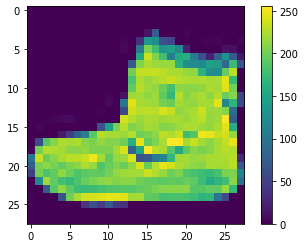

In [60]:
# sample image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [61]:
# normalize images
train_images = train_images / 255.0

test_images = test_images / 255.0

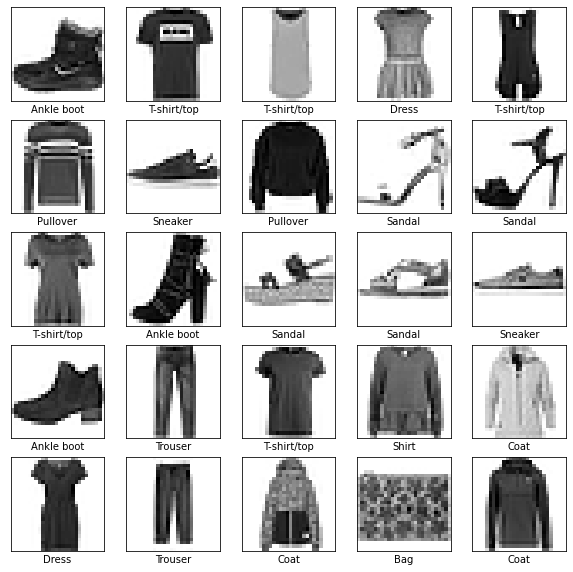

In [62]:
# sample images with labels

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [63]:
model = tf.keras.Sequential([ # NN architecture
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [64]:
model.compile(optimizer='adam', # model configuration
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=10) # learning

Epoch 1/10
1875/1875 [==============================] - 2s 955us/step - loss: 0.5013 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.3745 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.3351 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.3122 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 965us/step - loss: 0.2948 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.2785 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2689 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2485 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 1s 755us/st

In [66]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3535 - accuracy: 0.8781

Test accuracy: 0.8780999779701233


In [67]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) # apply softmax to have (i.e., interpret) the output as a vector of probabilities

In [68]:
predictions = probability_model.predict(test_images)
predictions[0]

array([3.08897288e-05, 3.22607674e-09, 1.72253056e-06, 3.24905784e-07,
       1.54037491e-06, 1.68025754e-02, 4.71080739e-07, 1.36194294e-02,
       1.12509525e-07, 9.69542980e-01], dtype=float32)

In [69]:
np.argmax(predictions[0]) # prediction by trained model

9

In [70]:
test_labels[0] # actual label

9

In [71]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

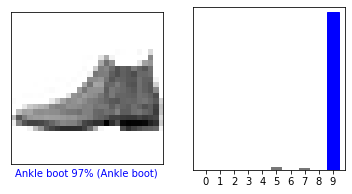

In [72]:
# plot prob mass ftn for each data
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

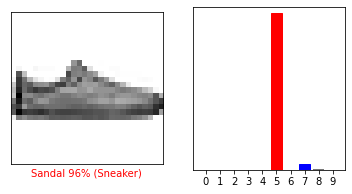

In [73]:
# a misclassified example
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

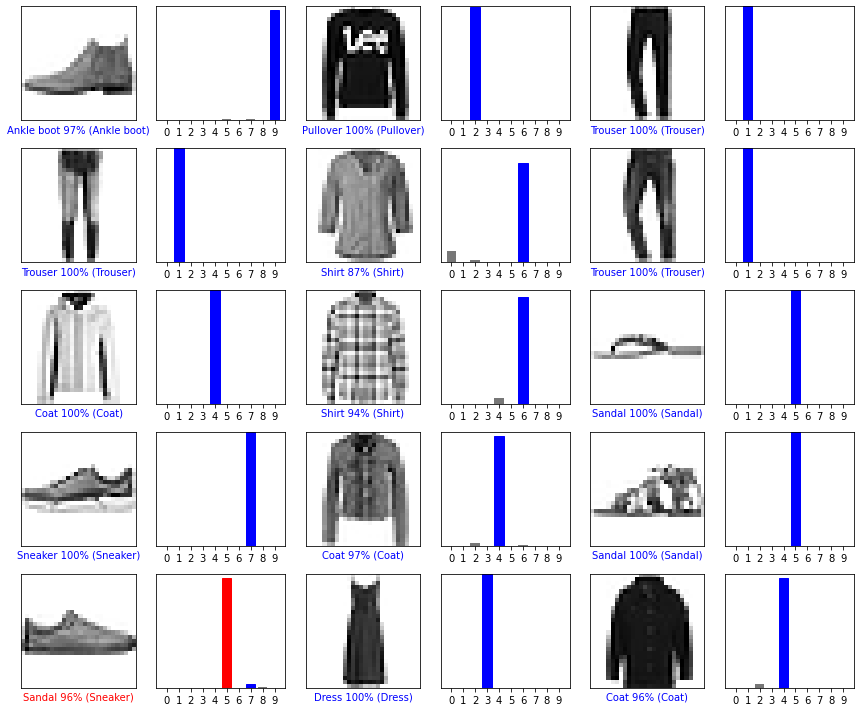

In [74]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[2.3594978e-03 2.2123317e-07 5.7850028e-03 4.6194512e-07 7.9175970e-03
  4.7576529e-01 5.8683356e-05 5.0408924e-01 4.0236129e-03 3.3211603e-07]]


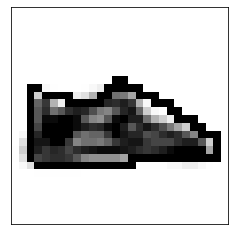

In [82]:
import imageio # for reading image files
im = imageio.imread('sample_data/shoes1.png') # you can use any 28x28 gray scale picture here (note: colored image will have the dimension 28x28x3)
print(im.shape) # 255 is white
# print(im)
#plt.imshow(im,cmap=plt.cm.binary)
#plt.show() # you can see that 255 is black, 0 is white here

# HOWEVER, 
im = 1 - im/256 # 1 is white, 0 is black in our setting

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(im, cmap=plt.cm.binary)
im = (np.expand_dims(im,0))
print(im.shape)
prediction_single = probability_model.predict(im)
print(prediction_single)

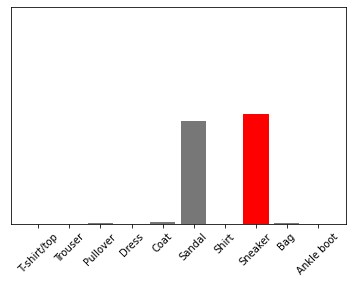

In [83]:
plot_value_array(0, prediction_single[0], test_labels) # true label doesn't exist here, so ignore the color in this plot
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()